# Figure Reproducibility
   ### By: JUSTFAIR MSU

[![Open in Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1DpeLa_TFcN_-6rL9YbFAjZgeFttyvDAG/view?usp=sharing)

## Description: 

This data is the data we were able to scrape from the Michigan Judicial Institute's Website, which includes data from Court of Appeals and the Michigan Supreme Court. Although we cannot answer questions about bias in sentencing with this data, it can tell us other things about Michigan judicial practices. This notebook contains information about a visualization representing the original court of Supreme Court and Court of Appeals cases in the state of Michigan. 


## Instructions for Installations:
You will need to make sure the following is installed:

- pandas
- matplotlib.pyplot
- numpy

If you do not already have these libraries downloaded, please run the cell below:

In [1]:
# Installs pandas
! pip install pandas

# Installs matplotlib
! pip install matplotlib

# Install numpy 
! pip install numpy

## Code to read in data:

Because this dataset is spread across multiple files, they are read in separately and combined into one Pandas DataFrame.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
min_case = 999
max_case = 31499
cases_per_file = 500

cases = [case_no for case_no in range(min_case, max_case, cases_per_file)]

df_list = []

for case_no in cases:
    file_path = f'CoA/court_of_appeals_case{case_no}.json'
    try:
        df = pd.read_json(file_path).T
        df_list.append(df)
    except:
        continue
    
df = pd.concat(df_list, axis=0, ignore_index=True)
df.head()

,findId,allParties,attorneys,barNumbers,caseLastUpdated,caseSearchUrl,caseTypes,consolidatedCases,courtOfAppealsCaseId,courtOfAppealsCaseNumber,...,message,publications,supremeCourtCaseId,supremeCourtCaseNumber,supremeCourtParties,supremeCourtPartyNames,supremeCourtStatus,supremeCourtOrderDockets,supremeCourtOrderDocketsWithDocuments,title
0,case-details-159176,"[PEOPLE OF MICHIGAN, HAYNES MAURICE JOHN, JONE...","[LEONARD ROBERT F-DISBARRED, SORDYL EUGENE E]","[16565, 20790]",None,/case-search/,[],[],1,1,...,None,"[005 Mich App 641, 007 Mich App 91]",None,None,[],[],None,[],[],PEOPLE V MAURICE JOHN HAYNES
1,case-details-219989,"[HOUGHS CARL E, MACKIE JOHN C COMMR]","[MIKESELL WILLARD L, KELLEY FRANK J]","[17712, 15818]",None,/case-search/,[],[],2,2,...,None,[001 Mich App 554],None,None,[],[],None,"[{'panel': None, 'comments': None, 'court': 1,...",[],HOUGHS CARL E V MACKIE JOHN C
2,case-details-952,"[ROSE EDWARD, CORPORATION SECUR COMM]","[LEVIN CHARLES L (RETIRED), KELLEY FRANK J]","[16600, 15818]",None,/case-search/,[],"[{'caseNumber': 5, 'caseUrl': '/c/courts/coa/c...",3,3,...,None,[],None,None,[],[],None,[],[],ROSE EDWARD V MICH CORP & SECURITI...
3,case-details-953,"[AUDREY HOMES INC, CORPORATION SECUR COMM]","[LEVIN CHARLES L (RETIRED), KELLEY FRANK J]","[16600, 15818]",None,/case-search/,[],[],4,4,...,None,[],None,None,[],[],None,[],[],AUDREY HOMES INC V MICH CORP & SECURITI...
4,case-details-954,[],[],[],None,/case-search/,[],"[{'caseNumber': 3, 'caseUrl': '/c/courts/coa/c...",5,5,...,None,[14 Mich App 330],None,None,[],[],None,[],[],ROSE EDWARD V MICH CORP & SE


## Convert/Sort Data

The code below converts the `filingDate` column to DateTime then sorts the dataframe by the corresponding date. The length of unique dates is found to determine the removal of an NA value when performing the group_by function. Thankfully, this data point was at the end of the dataset and could be easily indexed out. The group_by function is used to group the data by the `filingDate` unique values and returns the number of occurences for each date.

In [4]:
df["filingDate"] = pd.to_datetime(df["filingDate"])

In [5]:
df_time = df.sort_values(by="filingDate")

In [6]:
len(df_time["filingDate"].unique())

3806

In [7]:
filing_date = df_time.groupby(["filingDate"]).size()
filing_date

filingDate
1961-07-05    1
1961-10-21    3
1962-08-07    1
1962-08-13    1
1962-09-28    1
             ..
1977-03-07    1
1978-01-03    1
1981-04-02    1
1981-07-13    1
1982-08-25    1
Length: 3805, dtype: int64

## Plot the Data

The filing dates are plotted with the number of occurences for each date in order to view the trend of number of court filings over time. Since not all of the data is present, it appears that there are very few filings after 1977.

Text(0, 0.5, 'Number of Filings')

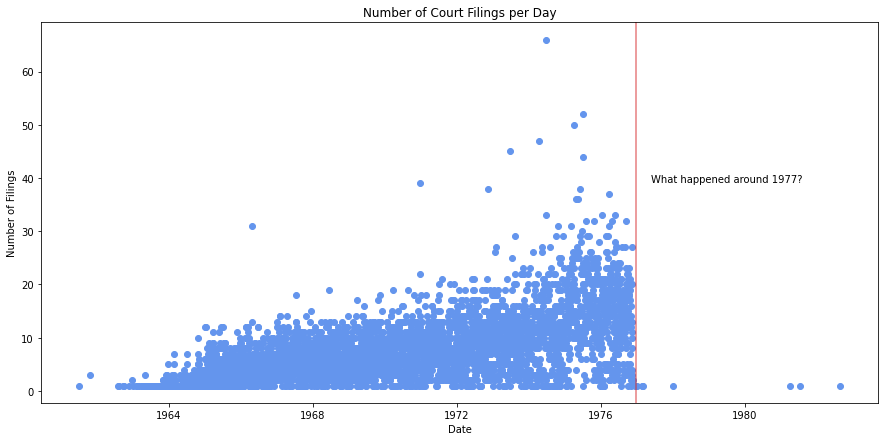

In [8]:
fig = plt.figure(figsize = (15, 7))
plt.scatter(df_time["filingDate"].unique()[:3805], filing_date, color="cornflowerblue")
plt.axvline(2550, color="tab:red", alpha=0.6)
plt.annotate('What happened around 1977?', xy=(4, 1),
            xytext=(0.91, 0.6), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top',
            )
plt.title("Number of Court Filings per Day")
plt.xlabel("Date")
plt.ylabel("Number of Filings")

### Let's replot this to show the majority of the data!

Text(0, 0.5, 'Number of Filings')

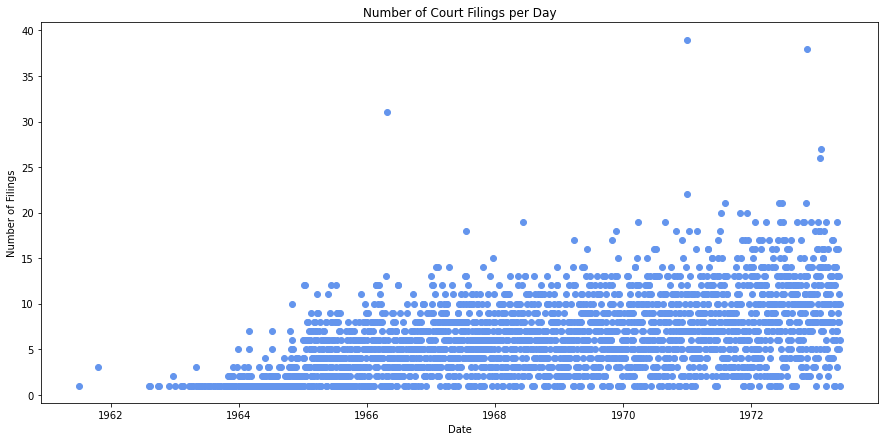

In [13]:
fig = plt.figure(figsize = (15, 7))
plt.scatter(df_time["filingDate"].unique()[:2750], filing_date[:2750], color="cornflowerblue")

plt.title("Number of Court Filings per Day")
plt.xlabel("Date")
plt.ylabel("Number of Filings")

### Much better!

Looking at this scatterplot we can tell there is un upward trend in the number of case filings over the years.